In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exercises

### Using the repo setup directions, setup a new local and remote repository named ```anomaly-detection-exercises```. The local version of your repo should live inside of ~/codeup-data-science. This repo should be named ```anomaly-detection-exercises```

### Save this work in your ```anomaly-detection-exercises``` repo. Then add, commit, and push your changes.

### continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb  
1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

## 1. Using ```lemonade.csv``` dataset and focusing on continuous variables:

* Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [5]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

In [7]:
df = pd.read_csv(url)
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


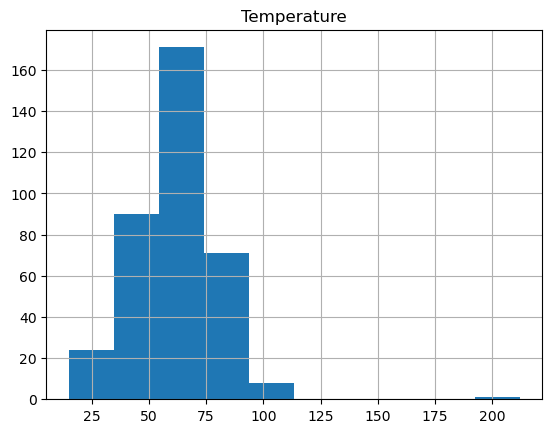

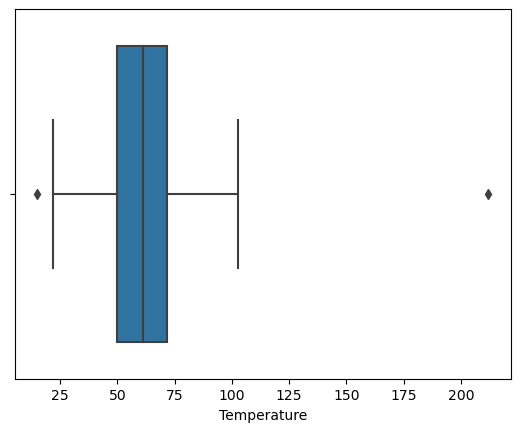

--------


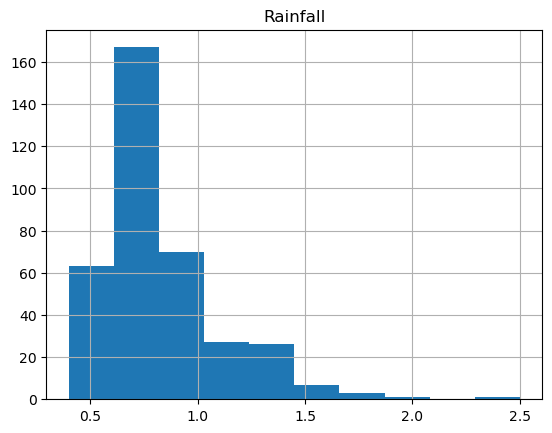

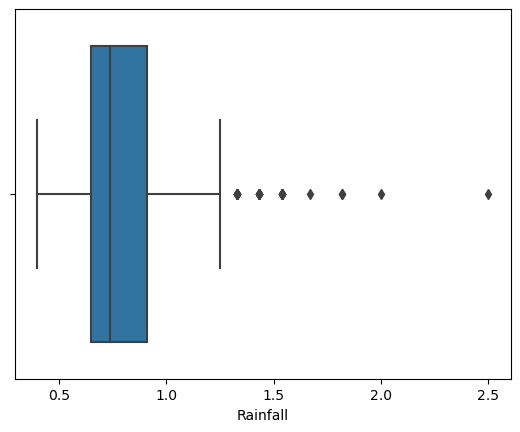

--------


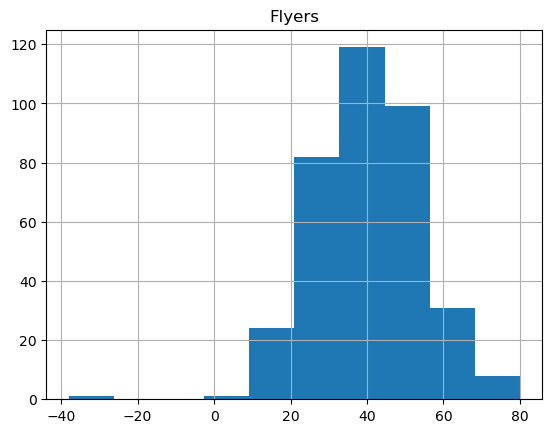

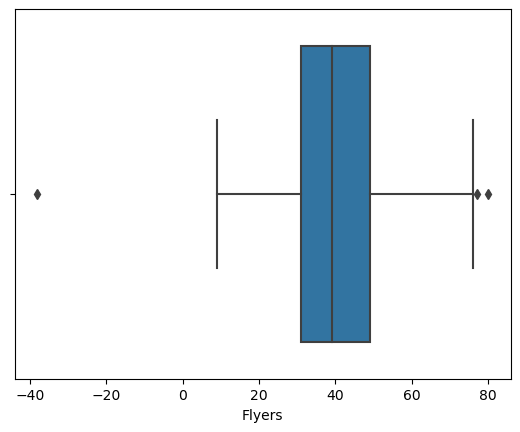

--------


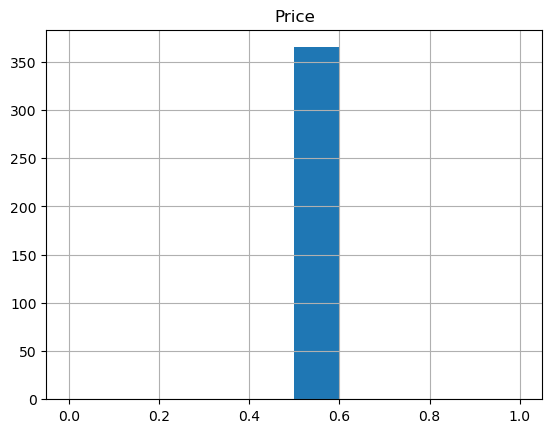

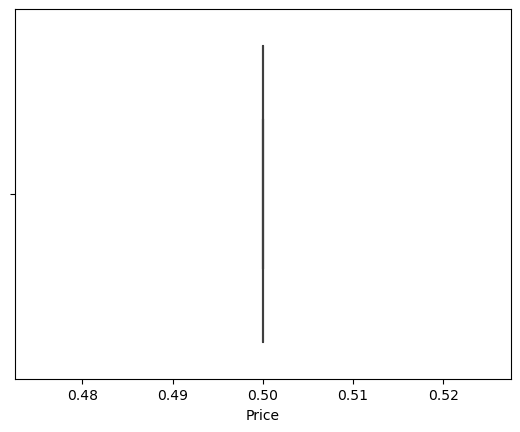

--------


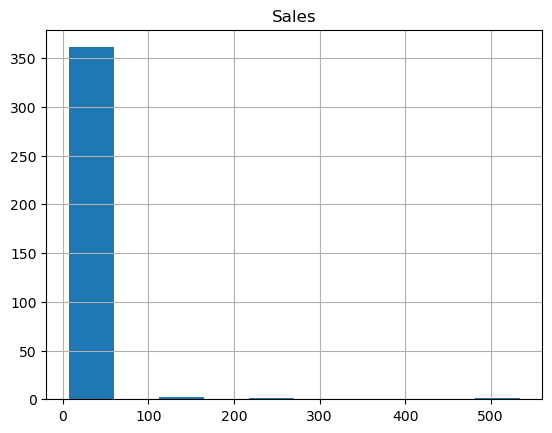

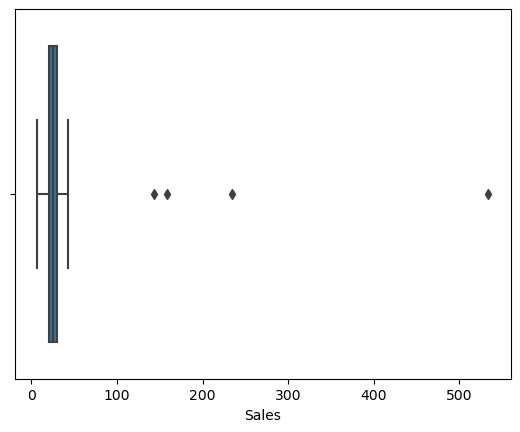

--------


In [8]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=df, x=col, whis=1.5)
        plt.show()
        print('--------')

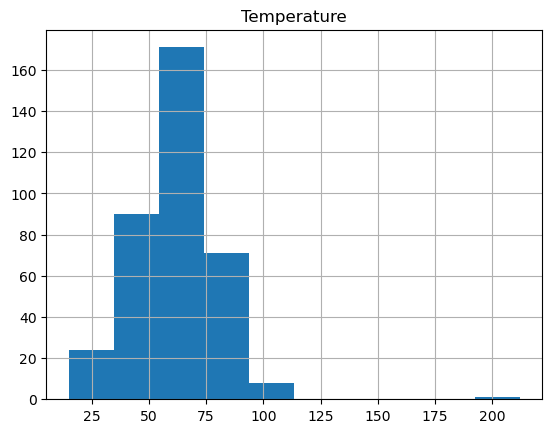

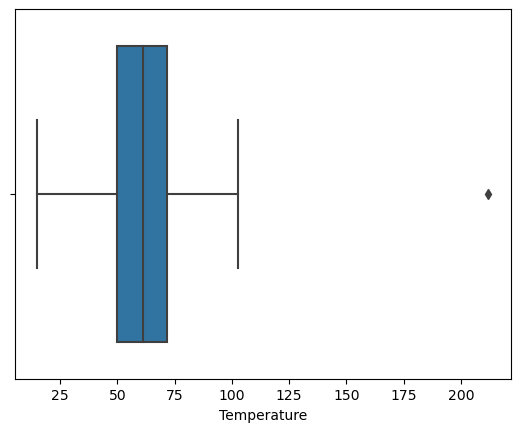

--------


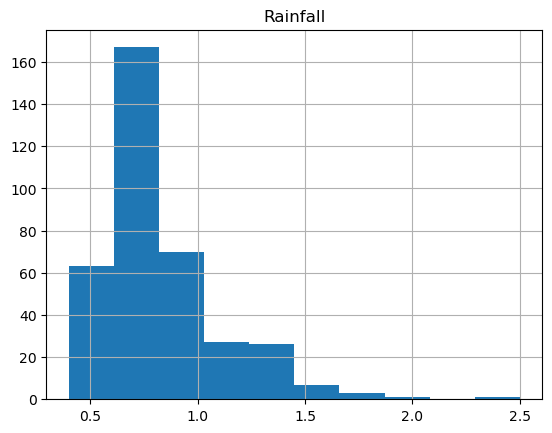

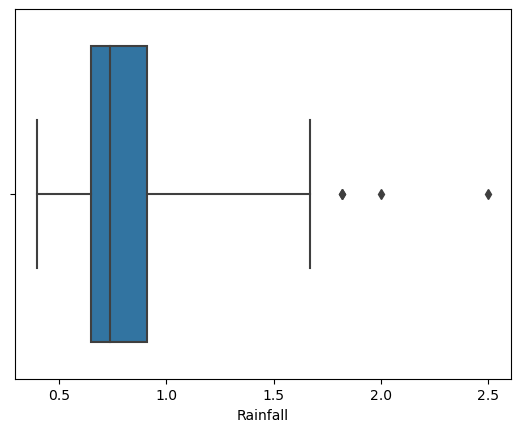

--------


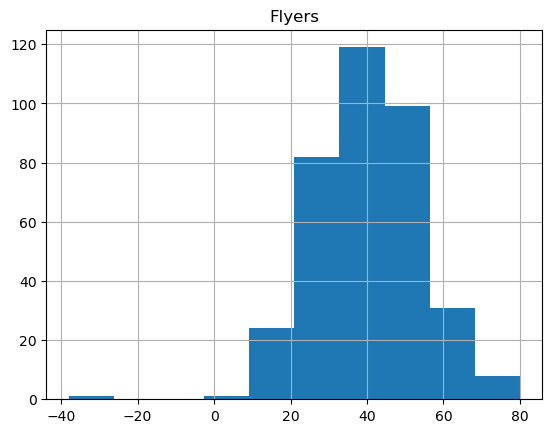

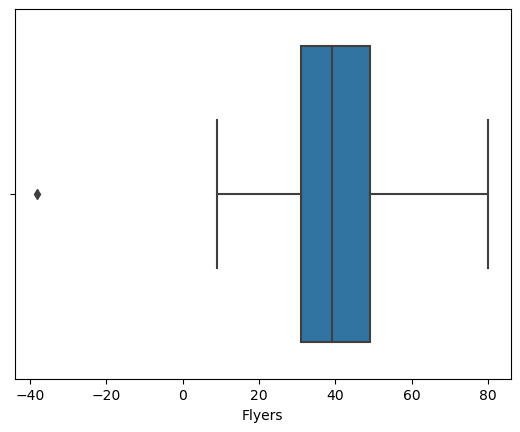

--------


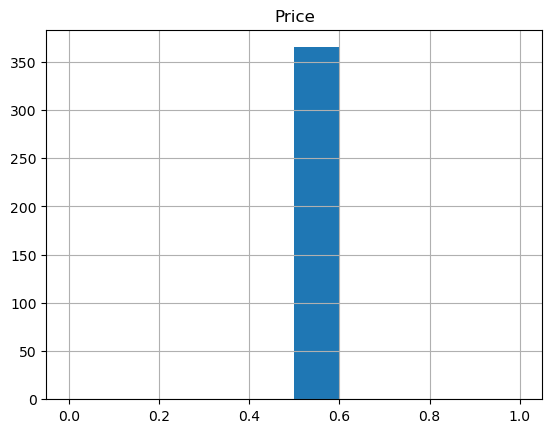

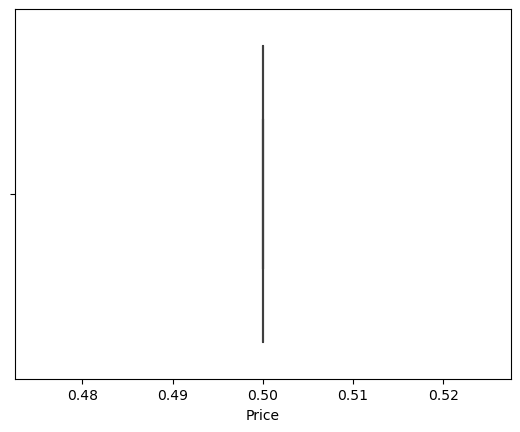

--------


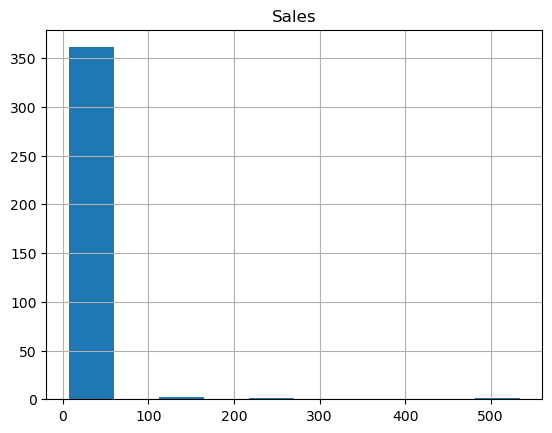

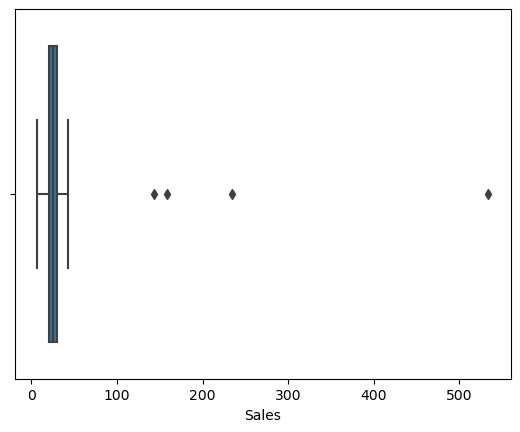

--------


In [10]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        plt.title(col)
        plt.show()
        sns.boxplot(data=df, x=col, whis=3)
        plt.show()
        print('--------')

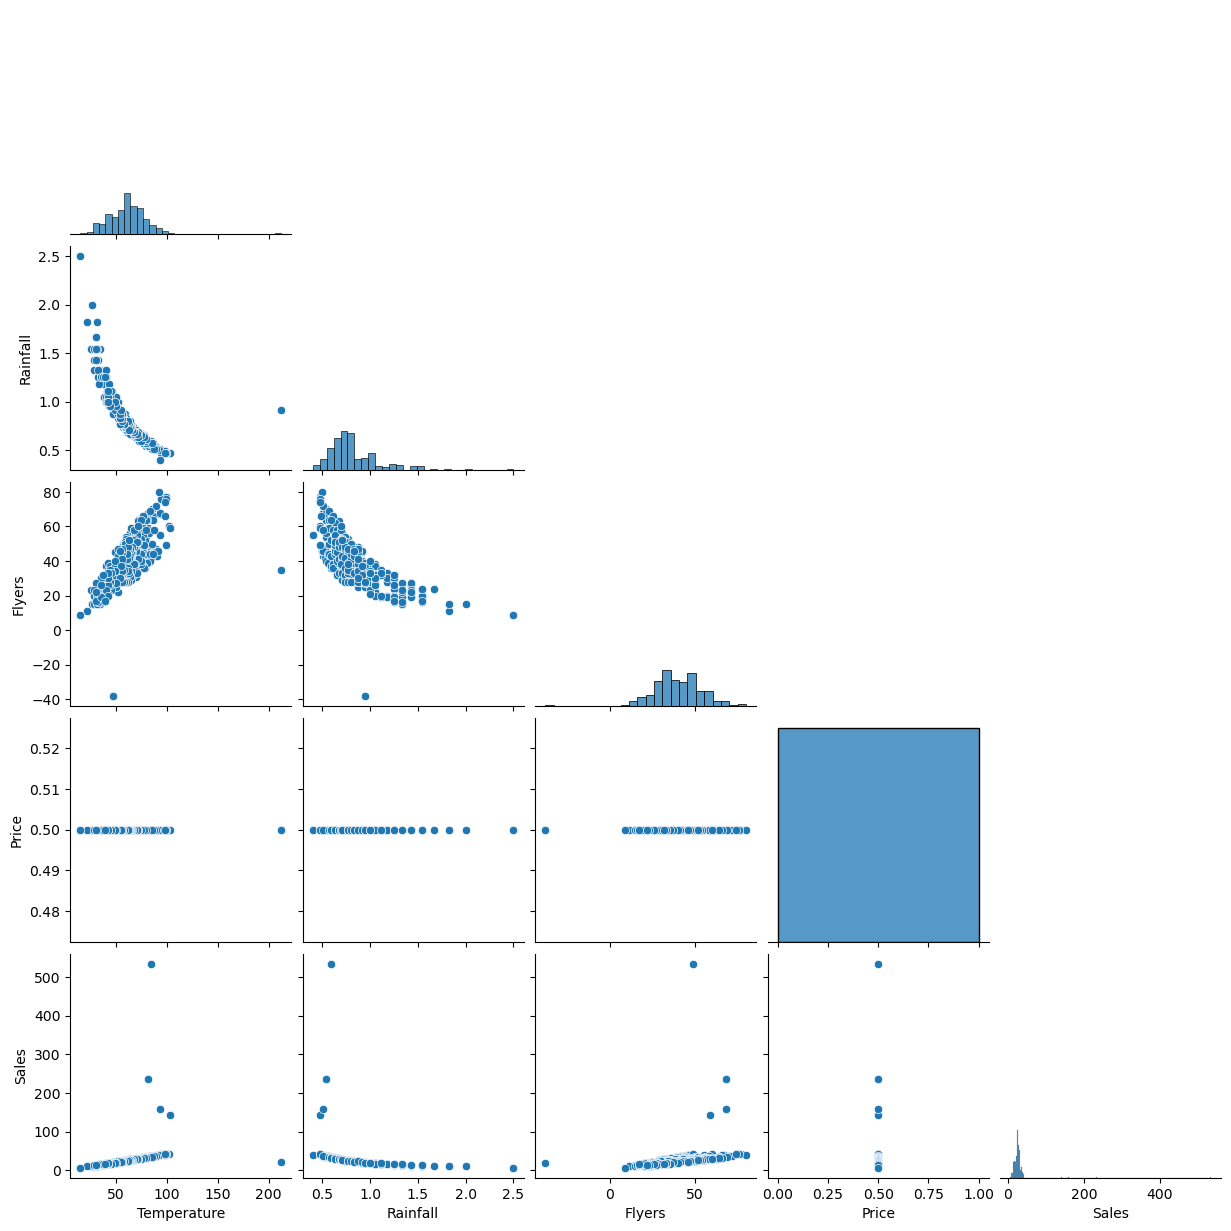

In [9]:
sns.pairplot(df, corner=True)

Temperature


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


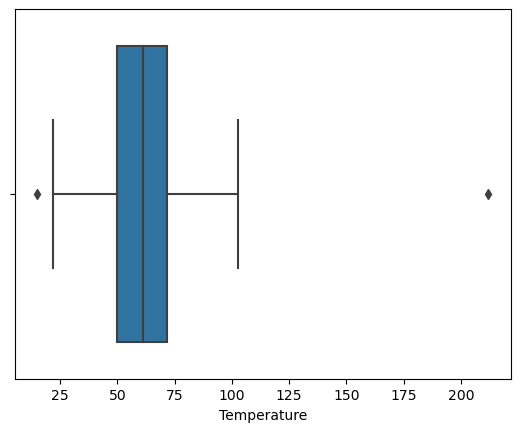

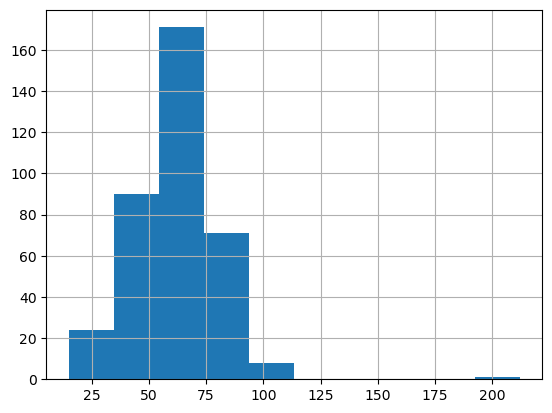

----------------
Rainfall


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


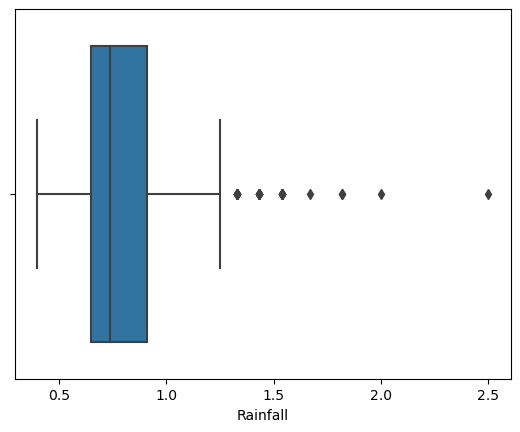

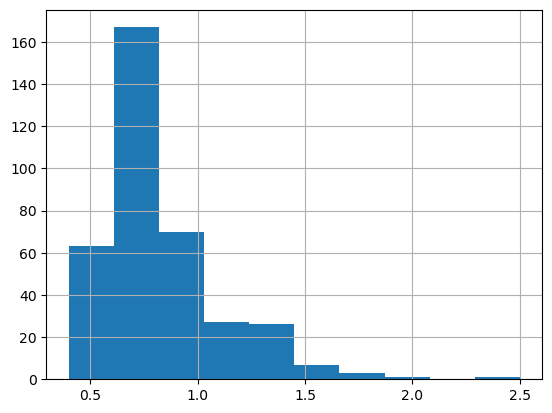

----------------
Flyers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


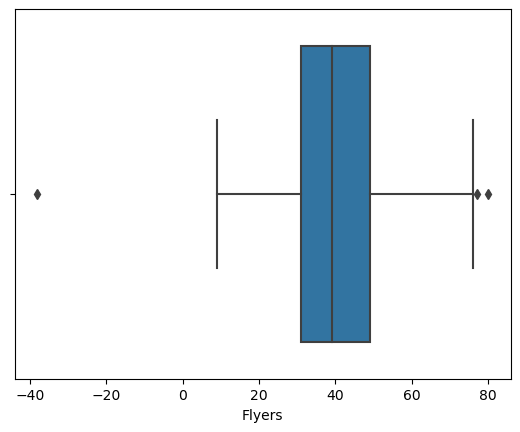

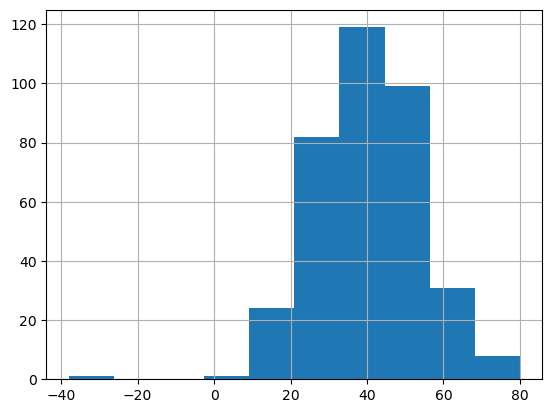

----------------
Price


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


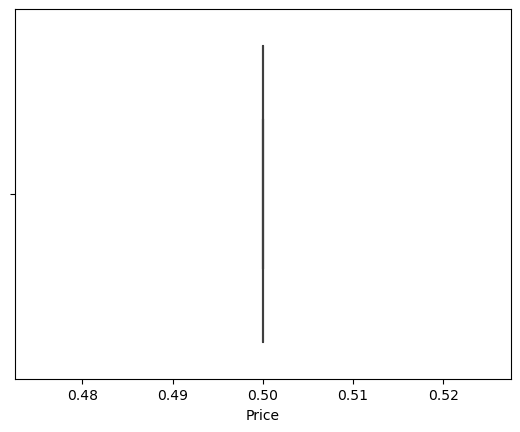

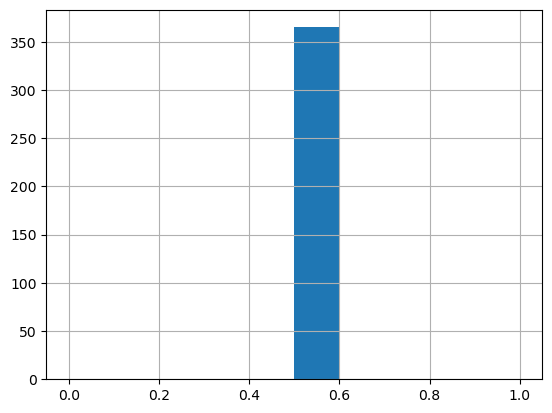

----------------
Sales


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


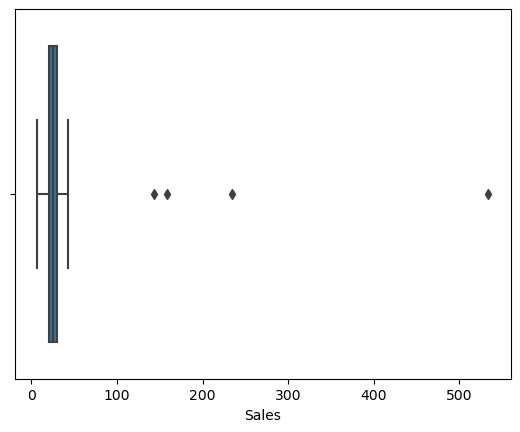

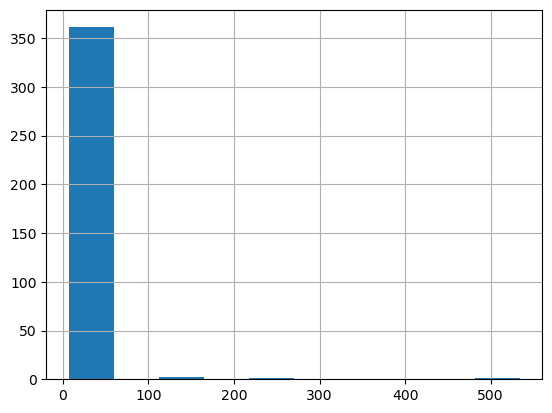

----------------


In [42]:
# to get the upper and lower
for col in df.drop(columns=['Date', 'Day']).columns:    
    # creating list for appending
    col_name = []
    col_from_df = []
    
    # start with an inner fence calculation
    multiplier = 1.5
    
    # calculate our q1 and q3
    # showing the number of rows from the range
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    # creating inner lower and upper fence
    inner_lower_fence = q1 - (multiplier * iqr)
    # inner_upper_fence = q3 + (multiplier * iqr)

    # creating the df with the result in upper and lower bound
    col_df = df[(df[col] < inner_lower_fence)]
    
    # appending results
    # print(f'IQR is: {iqr}')
    col_name.append(col)
    print(col)
    col_from_df.append(col_df)
    display(col_df)
    sns.boxplot(data=df, x=col, whis=1.5)
    plt.show()
    df[col].hist()
    plt.show()
    print('----------------')
    
    

* Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of ```lemonade.csv```, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

Temperature


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


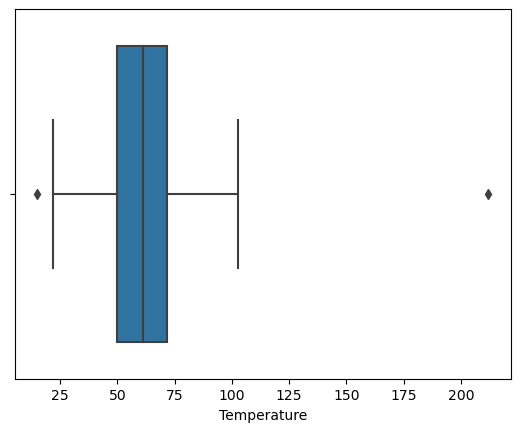

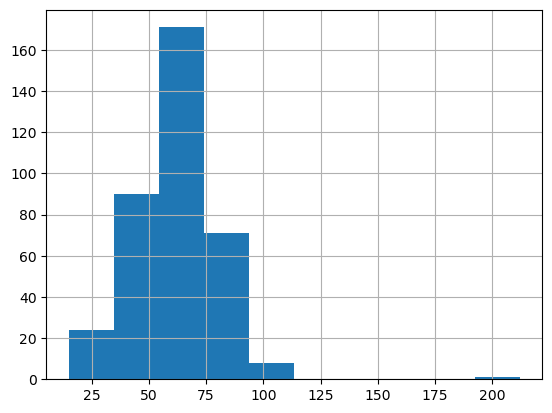

----------------
Rainfall


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


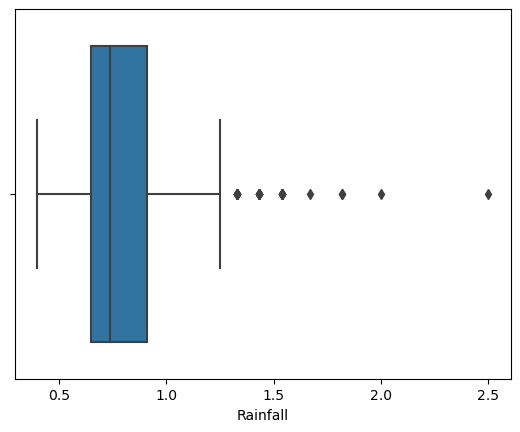

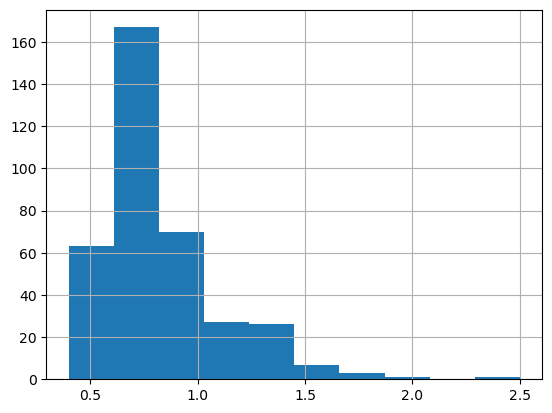

----------------
Flyers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


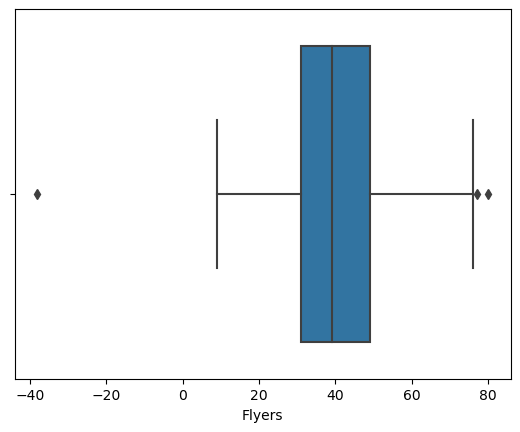

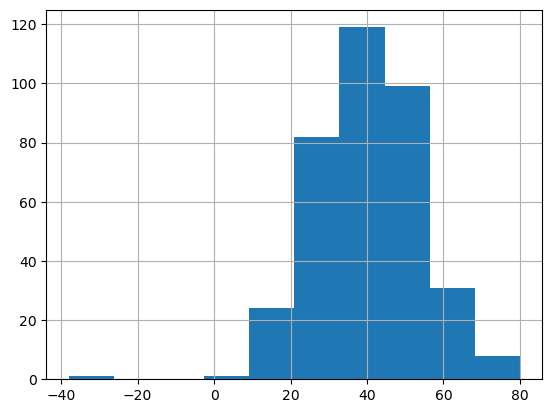

----------------
Price


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


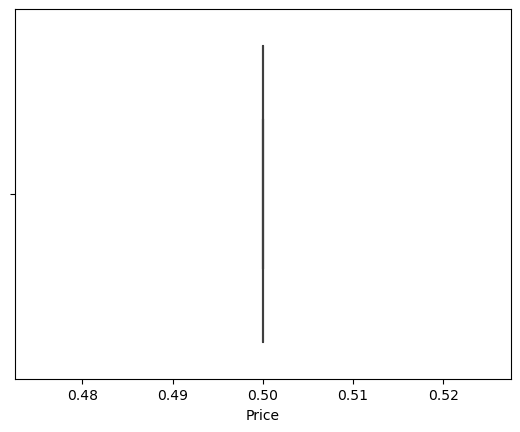

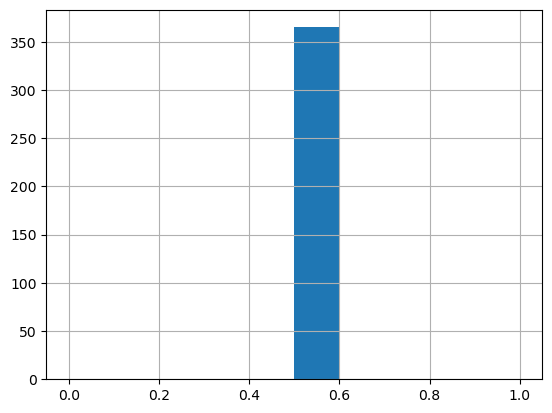

----------------
Sales


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


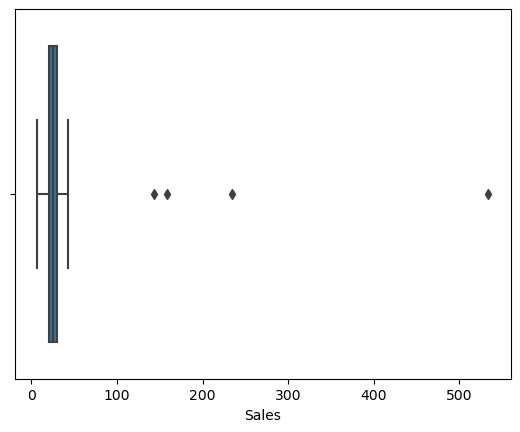

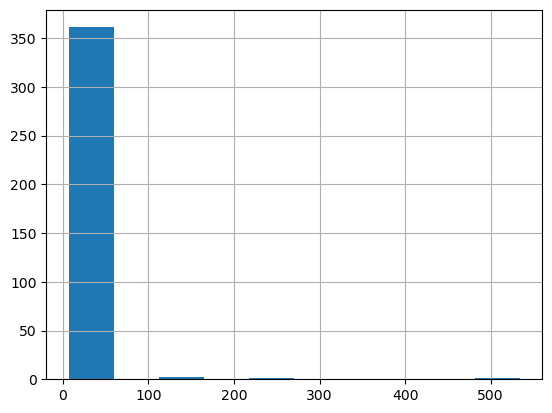

----------------


In [41]:
# to get the upper and lower
for col in df.drop(columns=['Date', 'Day']).columns:    
    # creating list for appending
    col_name = []
    col_from_df = []
    
    # start with an inner fence calculation
    multiplier = 1.5
    
    # calculate our q1 and q3
    # showing the number of rows from the range
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    # creating inner lower and upper fence
    # inner_lower_fence = q1 - (multiplier * iqr)
    inner_upper_fence = q3 + (multiplier * iqr)

    # creating the df with the result in upper and lower bound
    col_df = df[(df[col] > inner_upper_fence)]  # change to inner_upper_fence
    
    # appending results
    # print(f'IQR is: {iqr}')
    col_name.append(col)
    print(col)
    col_from_df.append(col_df)
    display(col_df)
    sns.boxplot(data=df, x=col, whis=1.5)
    plt.show()
    df[col].hist()
    plt.show()
    print('----------------')
    
    

* Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of ```lemonade.csv```. Do these lower outliers make sense? Which outliers should be kept?

Temperature


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


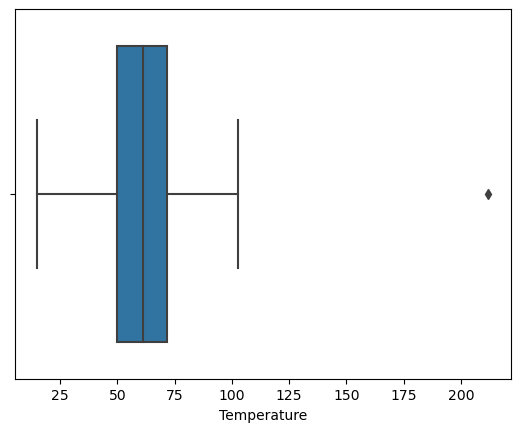

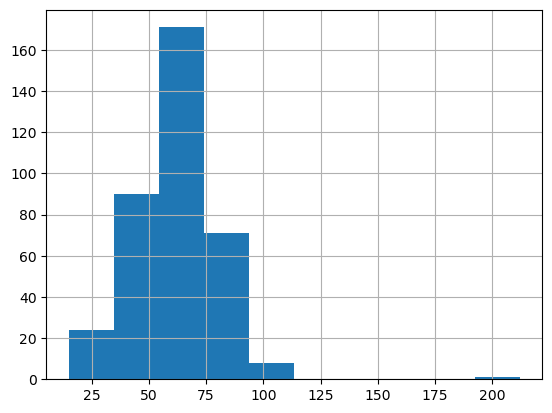

----------------
Rainfall


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


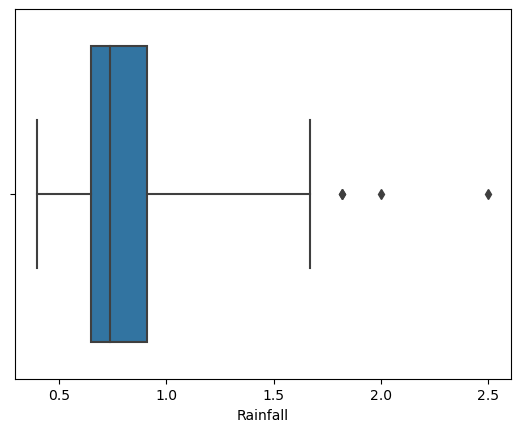

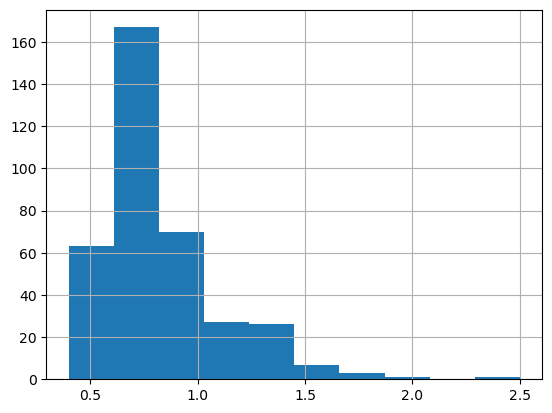

----------------
Flyers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


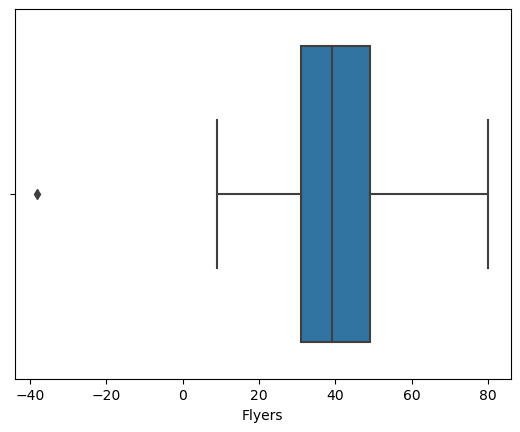

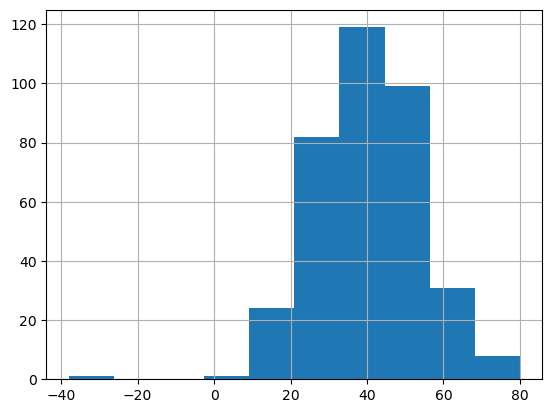

----------------
Price


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


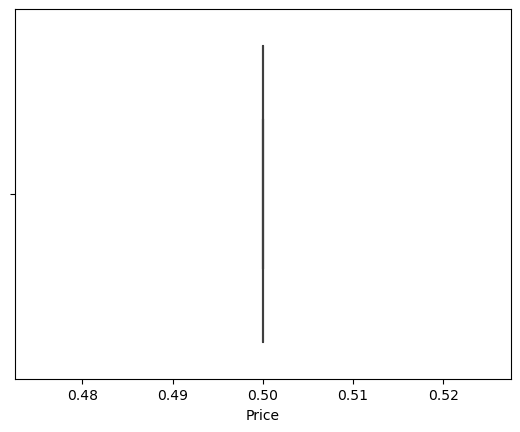

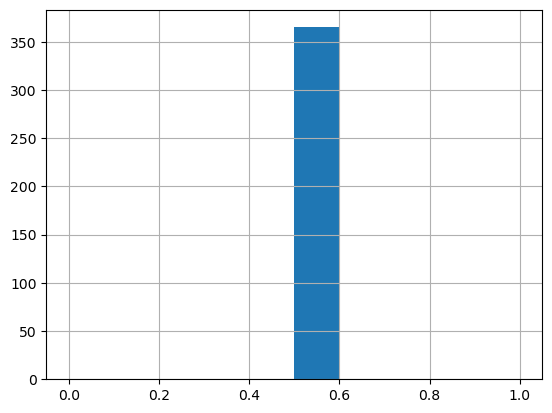

----------------
Sales


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


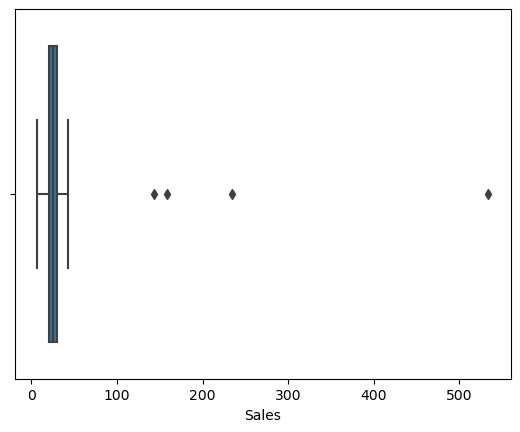

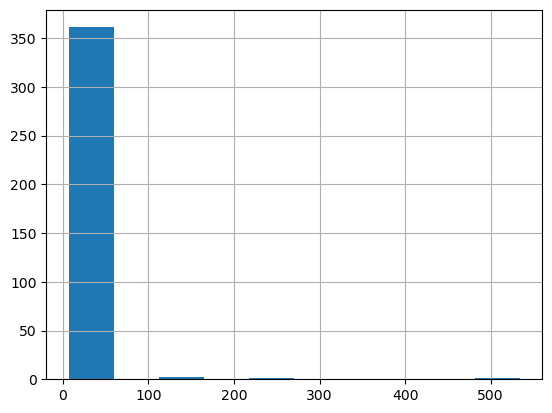

----------------


In [40]:
# to get the upper and lower
for col in df.drop(columns=['Date', 'Day']).columns:    
    # creating list for appending
    col_name = []
    col_from_df = []
    
    # start with an inner fence calculation
    multiplier = 3
    
    # calculate our q1 and q3
    # showing the number of rows from the range
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    # creating inner lower and upper fence
    outer_lower_fence = q1 - (multiplier * iqr)
    # outer_upper_fence = q3 + (multiplier * iqr)

    # creating the df with the result in upper and lower bound
    col_df = df[(df[col] < outer_lower_fence)]  # change variable and sign
    
    # appending results
    # print(f'IQR is: {iqr}')
    col_name.append(col)
    print(col)
    col_from_df.append(col_df)
    display(col_df)
    sns.boxplot(data=df, x=col, whis=3)
    plt.show()
    df[col].hist()
    plt.show()
    print('----------------')
    
    

* Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

Temperature


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


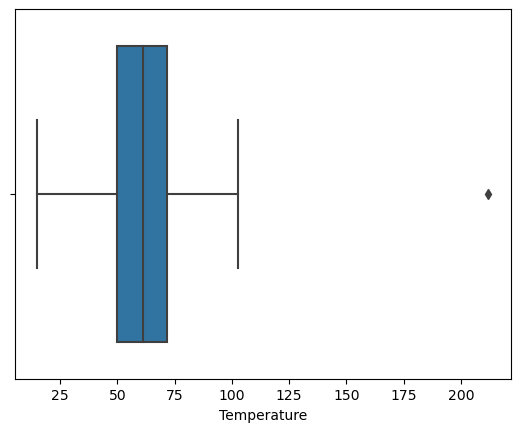

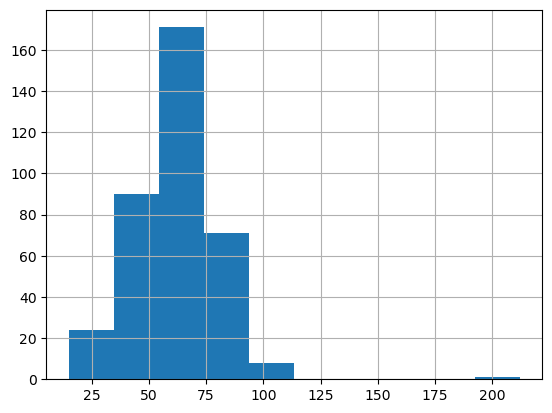

----------------
Rainfall


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


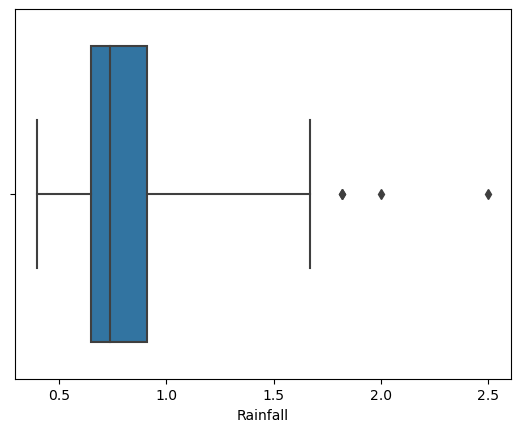

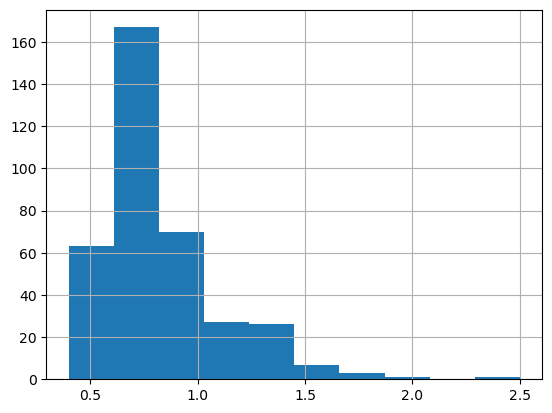

----------------
Flyers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


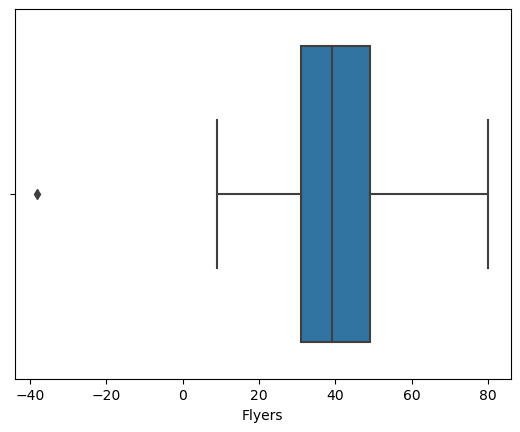

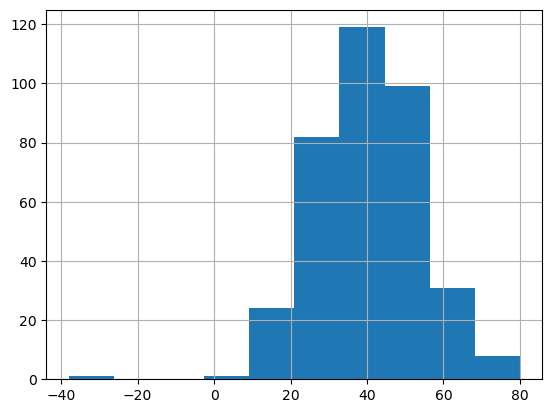

----------------
Price


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


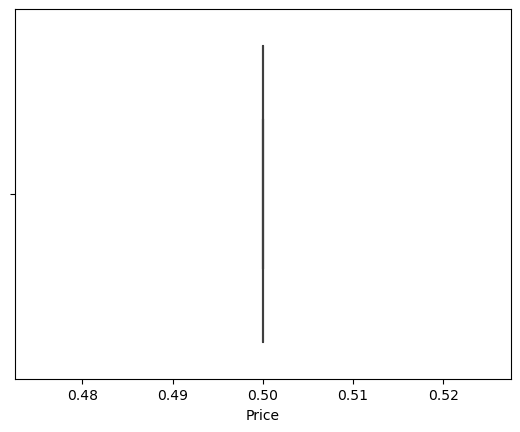

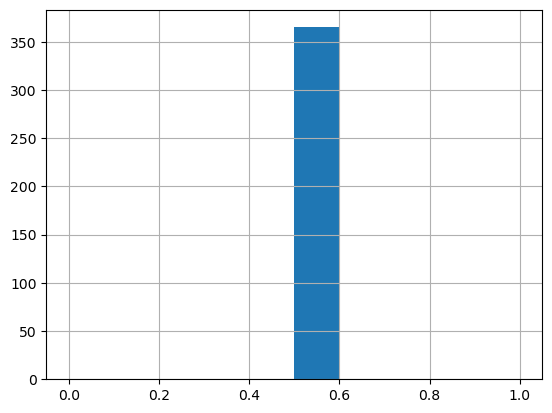

----------------
Sales


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


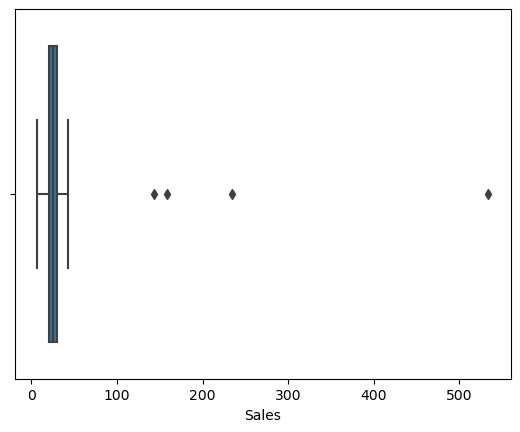

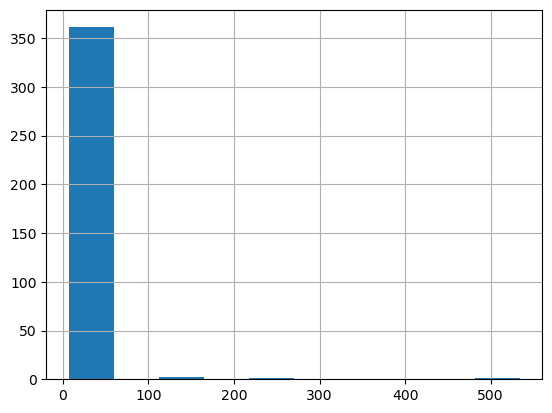

----------------


In [51]:
# to get the upper and lower
for col in df.drop(columns=['Date', 'Day']).columns:    
    # creating list for appending
    col_name = []
    col_from_df = []
    
    # start with an inner fence calculation
    multiplier = 3
    
    # calculate our q1 and q3
    # showing the number of rows from the range
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    # creating inner lower and upper fence
    # outer_lower_fence = q1 - (multiplier * iqr)
    outer_upper_fence = q3 + (multiplier * iqr)

    # creating the df with the result in upper and lower bound
    col_df = df[(df[col] > outer_upper_fence)]  # change variable and sign
    
    # appending results
    # print(f'IQR is: {iqr}')
    col_name.append(col)
    print(col)
    col_from_df.append(col_df)
    display(col_df)
    sns.boxplot(data=df, x=col, whis=3)
    plt.show()
    df[col].hist()
    plt.show()
    print('----------------')
    
    

## 2. Identify if any columns in ```lemonade.csv``` are normally distributed. For normally distributed columns:

* Use a 2 sigma decision rule to isolate the outliers.

In [102]:
# Reset the DataFrame to use this code below
df = pd.read_csv(url)
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


Temperature


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscores
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251
176,6/26/17,Monday,102.6,0.47,60,0.5,42,2.287714
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301
190,7/10/17,Monday,98.0,0.49,66,0.5,40,2.033372
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.105251
202,7/22/17,Saturday,99.6,0.47,49,0.5,42,2.121838
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.550311


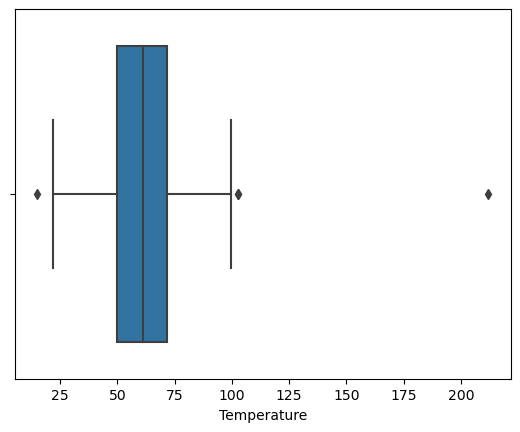

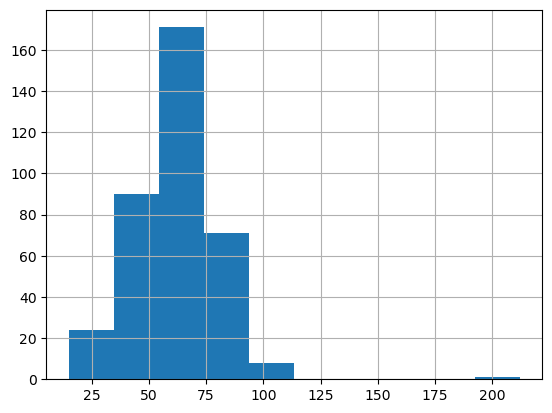

----------------
Rainfall


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscores,Rainfall_zscores
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488
5,1/6/17,Friday,25.3,1.54,23,0.5,11,-1.986336,2.606983
6,1/7/17,Saturday,32.9,1.54,19,0.5,13,-1.566119,2.606983
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12,-1.582706,2.606983
15,1/16/17,Monday,30.6,1.67,24,0.5,12,-1.693290,3.081626
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14,-1.604823,2.205363
19,1/20/17,Friday,31.6,1.43,20,0.5,12,-1.637998,2.205363
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12,-1.803873,2.606983
337,12/4/17,Monday,34.9,1.54,16,0.5,13,-1.455535,2.606983
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291


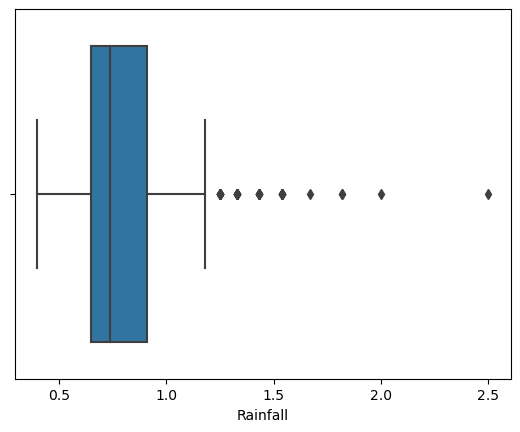

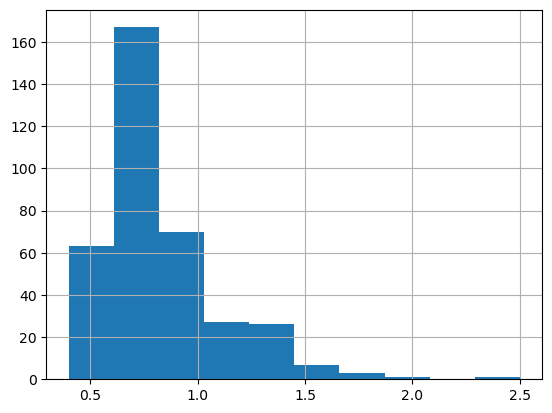

----------------
Flyers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscores,Rainfall_zscores,Flyers_zscores
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251,-1.299691,2.676244
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37,1.320109,-1.044114,2.168499
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41,1.828792,-1.299691,2.603709
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.779030,-1.153647,2.023429
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.121058,-1.044114,2.023429
194,7/14/17,Friday,92.0,0.50,80,0.5,40,1.701621,-1.190158,2.893849
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.105251,-1.299691,2.603709
203,7/23/17,Sunday,89.1,0.51,72,0.5,37,1.541275,-1.153647,2.313569
204,7/24/17,Monday,83.5,0.57,69,0.5,35,1.231642,-0.934581,2.095964
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843,-1.299691,2.458639


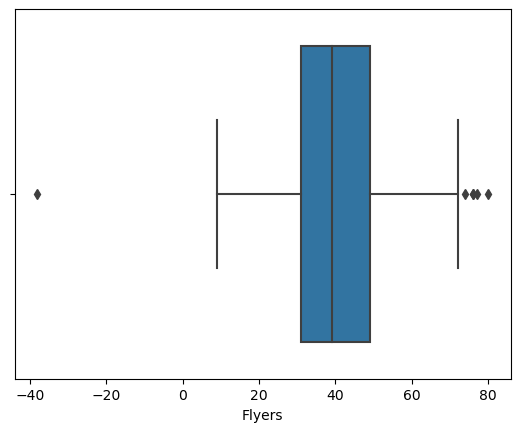

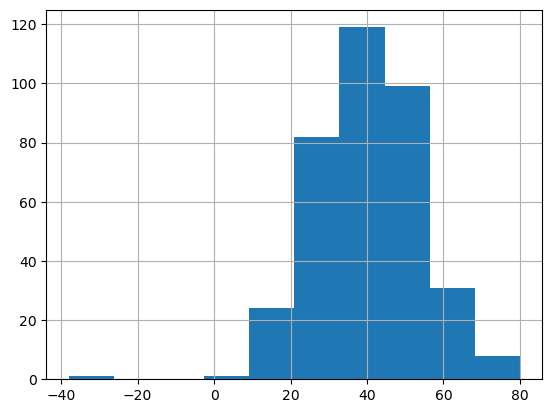

----------------
Price


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscores,Rainfall_zscores,Flyers_zscores,Price_zscores


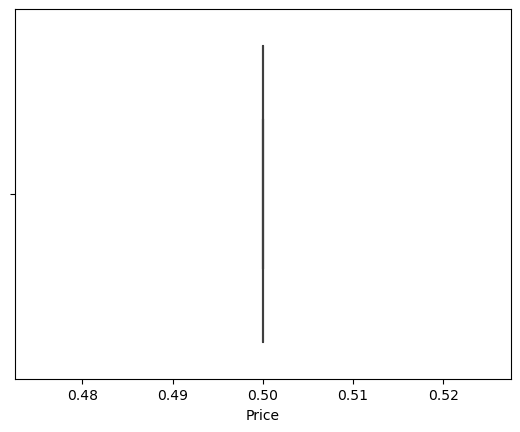

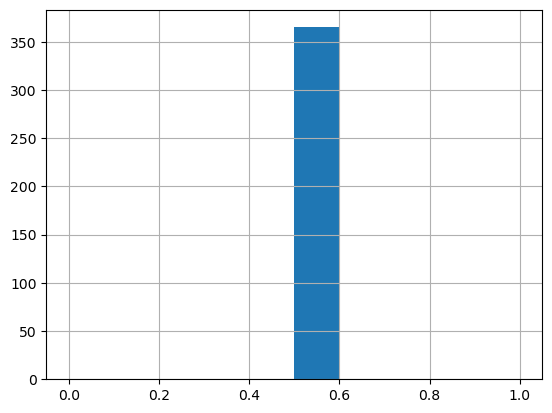

----------------
Sales


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscores,Rainfall_zscores,Flyers_zscores,Price_zscores,Sales_zscores
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,NaN,3.720233
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.779030,-1.153647,2.023429,NaN,4.204914
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.121058,-1.044114,2.023429,NaN,6.692948
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,1.270346,-0.861559,0.645264,NaN,16.354275


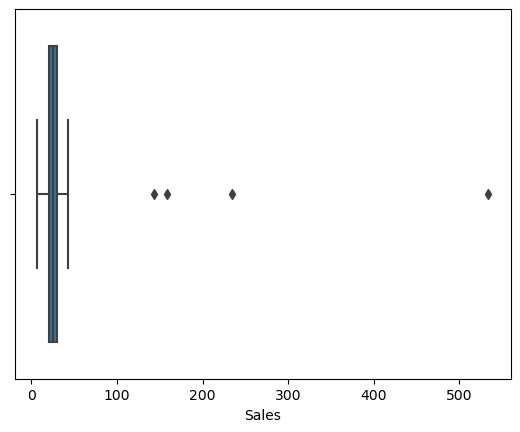

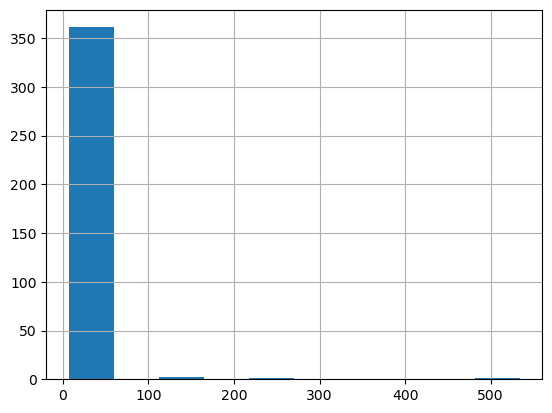

----------------


In [103]:
for col in df.drop(columns=['Date', 'Day']).columns:


    # Calculate the z-score 
    z_scores = pd.Series((df[col] - df[col].mean()) / df[col].std())

    # Finds all of the observations two standard deviations or more.
    df[f'{col}_zscores'] = z_scores

    # Filter the outliers and create a new DataFrame with the results
    outlier_df = df[df[f'{col}_zscores'].abs() >= 2] 
    
    
    print(col)
    display(outlier_df)
    sns.boxplot(data=df, x=col, whis=1.3)
    plt.show()
    df[col].hist()
    plt.show()
    print('----------------')


* Do these make sense?

They do but I would not delete some of these values

* Should certain outliers be kept or removed?

Certain outliers should be kept

## 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from ```lemonade.csv```

In [104]:
df = pd.read_csv(url)
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


Temperature


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscores
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627


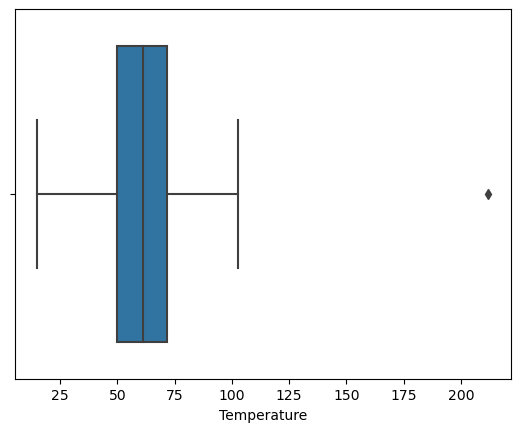

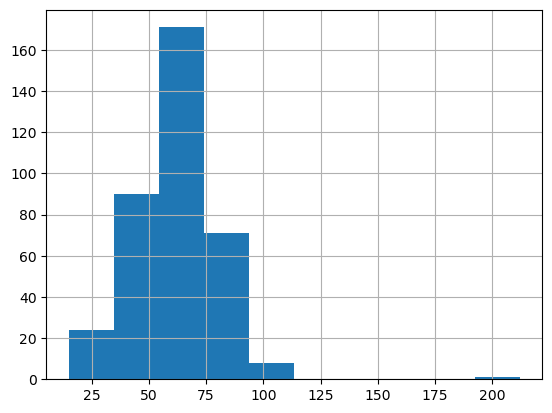

----------------
Rainfall


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscores,Rainfall_zscores
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340,4.286488
15,1/16/17,Monday,30.6,1.67,24,0.5,12,-1.693290,3.081626
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799,3.629291
343,12/10/17,Sunday,31.3,1.82,15,0.5,11,-1.654586,3.629291
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.550311,6.112037


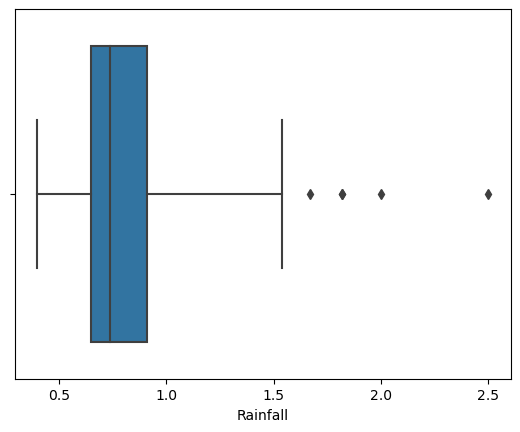

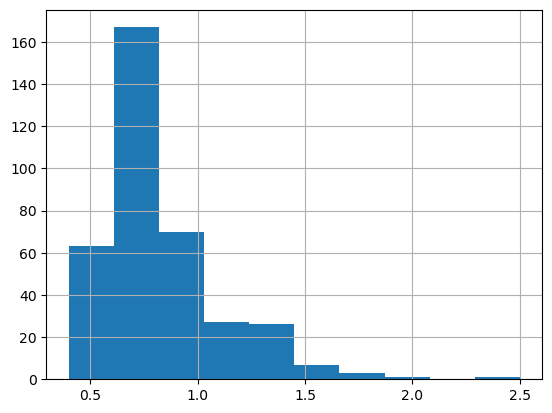

----------------
Flyers


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscores,Rainfall_zscores,Flyers_zscores
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,-0.786506,0.452836,-5.665283


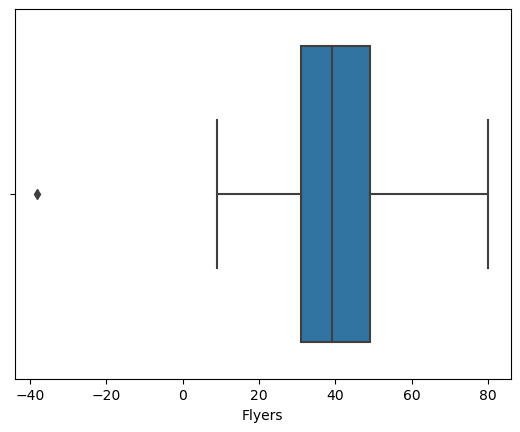

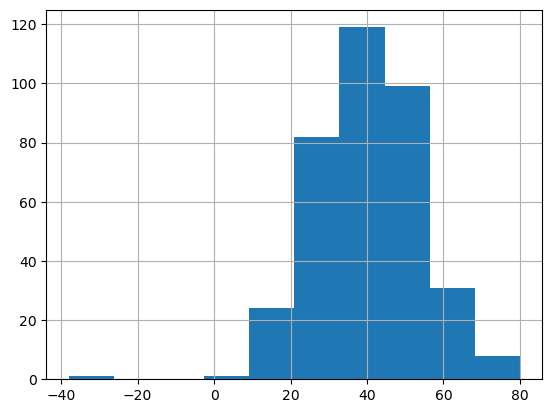

----------------
Price


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscores,Rainfall_zscores,Flyers_zscores,Price_zscores


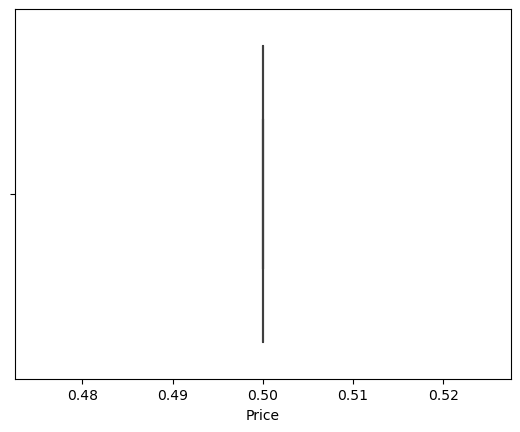

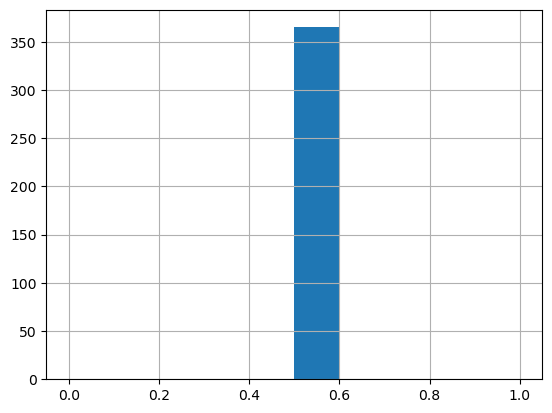

----------------
Sales


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_zscores,Rainfall_zscores,Flyers_zscores,Price_zscores,Sales_zscores
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301,-1.299691,1.370614,NaN,3.720233
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,1.779030,-1.153647,2.023429,NaN,4.204914
183,7/3/17,Monday,81.5,0.54,68,0.5,235,1.121058,-1.044114,2.023429,NaN,6.692948
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,1.270346,-0.861559,0.645264,NaN,16.354275


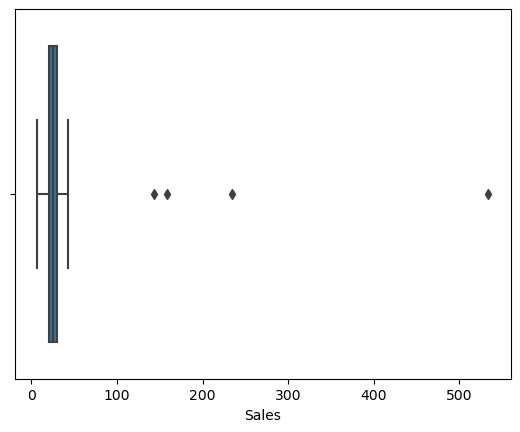

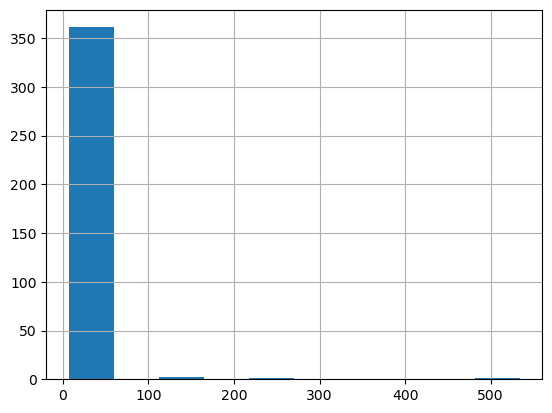

----------------


In [105]:
for col in df.drop(columns=['Date', 'Day']).columns:


    # Calculate the z-score 
    z_scores = pd.Series((df[col] - df[col].mean()) / df[col].std())

    # Finds all of the observations two standard deviations or more.
    df[f'{col}_zscores'] = z_scores

    # Filter the outliers and create a new DataFrame with the results
    outlier_df = df[df[f'{col}_zscores'].abs() >= 3] 
    
    
    print(col)
    display(outlier_df)
    sns.boxplot(data=df, x=col, whis=2.5)
    plt.show()
    df[col].hist()
    plt.show()
    print('----------------')
